In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Summation Unit
def summation_unit(weights, inputs):
    return np.dot(weights, inputs)

# Activation Functions
def step_activation(value):
    return 1 if value >= 0 else 0

def bipolar_step_activation(value):
    return 1 if value >= 0 else -1

def sigmoid_activation(value):
    return 1 / (1 + np.exp(-value))

def relu_activation(value):
    return max(0, value)

def leaky_relu_activation(value):
    return value if value >= 0 else 0.01 * value

# Error Comparator
def calculate_error(predicted, actual):
    return actual - predicted


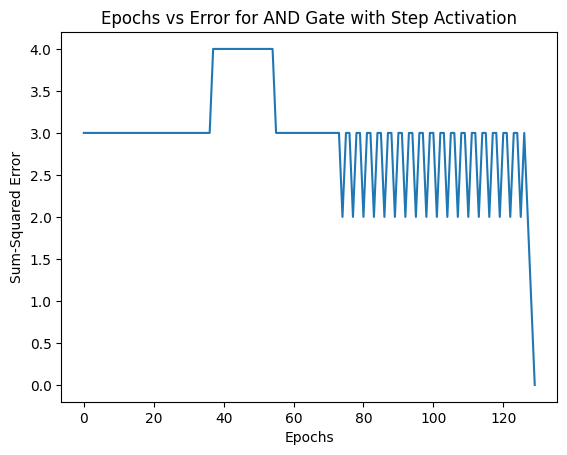

In [10]:
# Initialize weights and learning rate
weights = np.array([10, 0.2, -0.75])  # w0, w1, w2
learning_rate = 0.05
inputs = np.array([[1, 0, 0],
                   [1, 0, 1],
                   [1, 1, 0],
                   [1, 1, 1]])  # Bias + Input A + Input B
outputs = np.array([0, 0, 0, 1])

def perceptron_training(inputs, outputs, weights, activation_fn, learning_rate, max_epochs=1000, error_threshold=0.002):
    errors = []
    epochs = 0

    while epochs < max_epochs:
        total_error = 0
        for i in range(len(inputs)):
            summation = summation_unit(weights, inputs[i])
            predicted = activation_fn(summation)
            error = calculate_error(predicted, outputs[i])
            weights += learning_rate * error * inputs[i]
            total_error += error**2
        
        errors.append(total_error)
        epochs += 1
        if total_error <= error_threshold:
            break

    return weights, errors, epochs

final_weights, error_values, total_epochs = perceptron_training(inputs, outputs, weights, step_activation, learning_rate)

# Plot epochs vs. error values
plt.plot(range(total_epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for AND Gate with Step Activation')
plt.show()


In [11]:
def train_with_activation(inputs, outputs, activation_func, epochs=1000, lr=0.05):
    weights = [10, 0.2, -0.75]
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation = summation_unit([1] + inputs[i], weights)
            prediction = activation_func(summation)
            error = calculate_error(prediction, outputs[i])
            total_error += error ** 2
            for j in range(len(weights)):
                weights[j] += lr * error * ([1] + inputs[i])[j]
        if total_error <= 0.002:
            break
    return weights, epoch

# Example using Sigmoid Function
weights, epochs = train_with_activation(inputs, outputs, sigmoid_activation)


In [12]:
learning_rates = [0.1 * i for i in range(1, 11)]
iterations = []

for lr in learning_rates:
    _, _, total_epochs = perceptron_training(inputs, outputs, weights.copy(), step_activation, lr)
    iterations.append(total_epochs)



Step Activation: Final Weights: [-6.36825004  3.59695315  3.5414717 ], Epochs to Converge: 1
Bipolar Step Activation: Final Weights: [-0.06825004  0.19695315  0.1414717 ], Epochs to Converge: 1000
Sigmoid Activation: Final Weights: [-8.24764464  5.38448534  5.37948332], Epochs to Converge: 1000
ReLU Activation: Final Weights: [-6.30253856  3.66266463  3.60718318], Epochs to Converge: 12


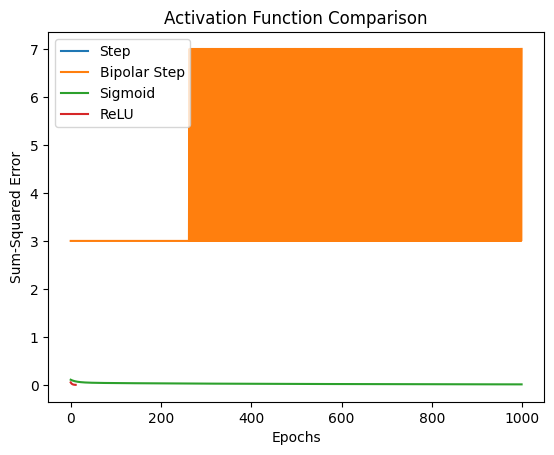

In [14]:
# Compare with Bipolar Step and Sigmoid Activation Functions
activation_functions = {
    'Step': step_activation,
    'Bipolar Step': bipolar_step_activation,
    'Sigmoid': sigmoid_activation,
    'ReLU': relu_activation
}

results = {}
for name, activation_fn in activation_functions.items():
    final_weights, error_values, total_epochs = perceptron_training(inputs, outputs, weights.copy(), activation_fn, learning_rate)
    results[name] = (final_weights, error_values, total_epochs)

# Print the results
for name, (final_weights, error_values, total_epochs) in results.items():
    print(f"{name} Activation: Final Weights: {final_weights}, Epochs to Converge: {total_epochs}")

# Plot comparisons
for name, (_, error_values, total_epochs) in results.items():
    plt.plot(range(total_epochs), error_values, label=name)

plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Activation Function Comparison')
plt.legend()
plt.show()


Customer Data Perceptron: Final Weights: [ 0.78544714 -1.68093292 11.08884983 -0.13666299], Epochs to Converge: 20


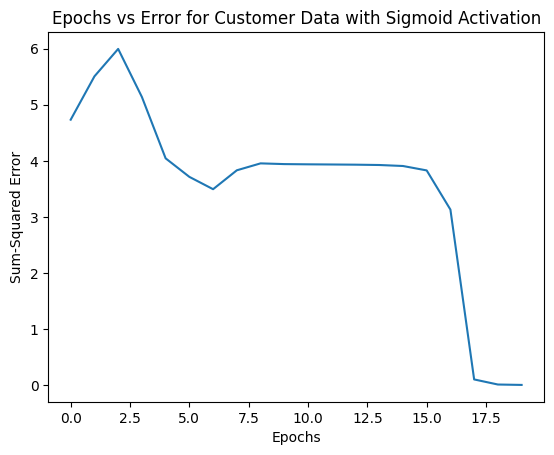

In [16]:
# Customer Data inputs and outputs
customer_data = np.array([
    [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2], [24, 4, 2],
    [22, 1, 5], [15, 4, 2], [18, 4, 2], [21, 1, 4], [16, 2, 4]
])
customer_labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights for customer data
weights = np.random.rand(customer_data.shape[1] + 1)
learning_rate = 0.1

# Add bias term
customer_data = np.hstack([np.ones((customer_data.shape[0], 1)), customer_data])

# Train perceptron on customer data
final_weights, error_values, total_epochs = perceptron_training(customer_data, customer_labels, weights, sigmoid_activation, learning_rate)

print(f"Customer Data Perceptron: Final Weights: {final_weights}, Epochs to Converge: {total_epochs}")

plt.plot(range(total_epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for Customer Data with Sigmoid Activation')
plt.show()


In [17]:
import numpy as np

def pseudo_inverse_solution(data, labels):
    X = np.array([[1] + d for d in data])
    Y = np.array(labels)
    pseudo_inv = np.linalg.pinv(X)
    weights = np.dot(pseudo_inv, Y)
    return weights

weights_pseudo = pseudo_inverse_solution(customer_data, customer_labels)


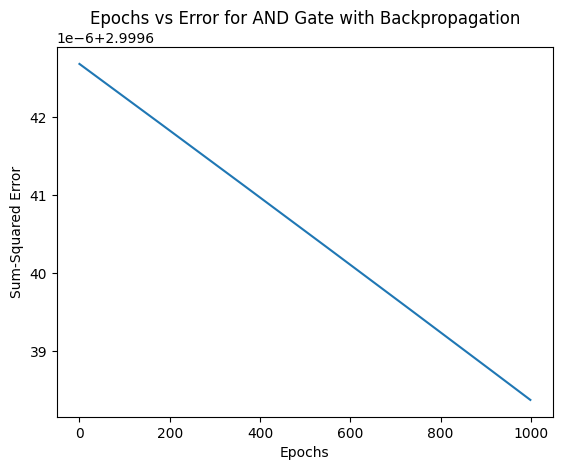

Final Total Error: 2.9996383787045424
Errors for each input in the final epoch: [np.float64(-0.9999541923924353), np.float64(-0.999902560109277), np.float64(-0.9999624254668023), np.float64(7.992760551356337e-05)]


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Summation Unit
def summation_unit(weights, inputs):
    return np.dot(weights, inputs)

# Sigmoid Activation Function
def sigmoid_activation(value):
    return 1 / (1 + np.exp(-value))

# Sigmoid Derivative Function
def sigmoid_derivative(value):
    return value * (1 - value)

# Error Comparator
def calculate_error(predicted, actual):
    return actual - predicted

# Backpropagation Training Function
def backpropagation_training(inputs, outputs, weights, learning_rate, max_epochs=1000, error_threshold=0.002):
    errors = []
    epochs = 0

    while epochs < max_epochs:
        total_error = 0
        for i in range(len(inputs)):
            summation = summation_unit(weights, inputs[i])
            predicted = sigmoid_activation(summation)
            error = calculate_error(predicted, outputs[i])
            adjustment = error * sigmoid_derivative(predicted)
            weights += learning_rate * adjustment * inputs[i]
            total_error += error**2
        
        errors.append(total_error)
        epochs += 1
        if total_error <= error_threshold:
            break

    return weights, errors, epochs

# Initialize weights, inputs, and outputs for the AND gate
weights = np.array([10, 0.2, -0.75])  # Initial weights: w0, w1, w2
learning_rate = 0.05
inputs = np.array([[1, 0, 0],  # Bias + Input A + Input B
                   [1, 0, 1],
                   [1, 1, 0],
                   [1, 1, 1]])
outputs = np.array([0, 0, 0, 1])  # AND Gate outputs

# Train the perceptron using backpropagation
final_weights, error_values, total_epochs = backpropagation_training(inputs, outputs, weights, learning_rate)

# Plot the epochs vs. error values
plt.plot(range(total_epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for AND Gate with Backpropagation')
plt.show()

# Output the final total error after training
final_total_error = error_values[-1]  # The last value in the error_values list
print(f"Final Total Error: {final_total_error}")

# Errors for each input in the final epoch
final_epoch_errors = []
for i in range(len(inputs)):
    summation = summation_unit(final_weights, inputs[i])
    predicted = sigmoid_activation(summation)
    error = calculate_error(predicted, outputs[i])
    final_epoch_errors.append(error)

print(f"Errors for each input in the final epoch: {final_epoch_errors}")


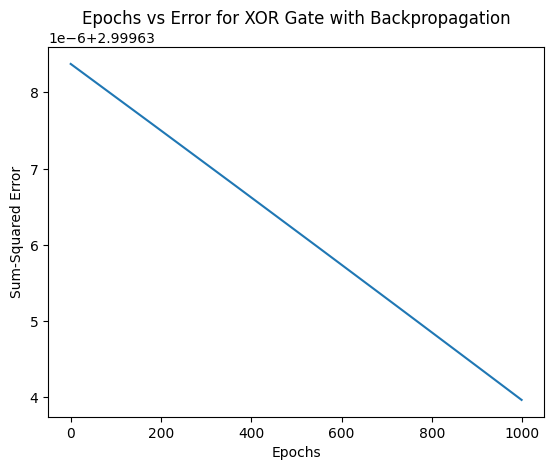

In [19]:
# Repeat the backpropagation training for XOR logic
final_weights, error_values, total_epochs = backpropagation_training(inputs, outputs, weights, learning_rate)

plt.plot(range(total_epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for XOR Gate with Backpropagation')
plt.show()


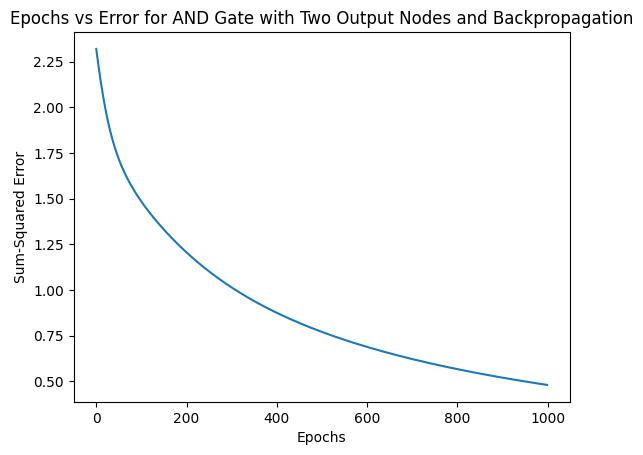

Final Total Error: 0.4809235531918217
Errors for each input in the final epoch: [array([ 0.05573078, -0.0524726 ]), array([ 0.25834372, -0.2571453 ]), array([ 0.26149379, -0.25523693]), array([-0.32364632,  0.31824874])]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Summation Unit
def summation_unit(weights, inputs):
    return np.dot(weights.T, inputs)  # Transpose the weights matrix

# Sigmoid Activation Function
def sigmoid_activation(value):
    return 1 / (1 + np.exp(-value))

# Sigmoid Derivative Function
def sigmoid_derivative(value):
    return value * (1 - value)

# Error Comparator for multi-output perceptron
def calculate_error(predicted, actual):
    return actual - predicted

# Backpropagation Training Function for multi-output perceptron
def backpropagation_training(inputs, outputs, weights, learning_rate, max_epochs=1000, error_threshold=0.002):
    errors = []
    epochs = 0

    while epochs < max_epochs:
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            summation = summation_unit(weights, inputs[i])
            predicted = sigmoid_activation(summation)
            error = calculate_error(predicted, outputs[i])
            adjustment = error * sigmoid_derivative(predicted)
            
            # Backward pass (weight update)
            weights += learning_rate * np.outer(inputs[i], adjustment)
            
            total_error += np.sum(error**2)
        
        errors.append(total_error)
        epochs += 1
        if total_error <= error_threshold:
            break

    return weights, errors, epochs

# Initialize weights, inputs, and outputs for the AND gate with two output nodes
weights = np.random.rand(3, 2)  # Weights for two output nodes, each with 3 inputs (bias + 2 inputs)
learning_rate = 0.05
inputs = np.array([[1, 0, 0],  # Bias + Input A + Input B
                   [1, 0, 1],
                   [1, 1, 0],
                   [1, 1, 1]])

# Desired outputs with two output nodes
outputs = np.array([[1, 0],  # For AND gate output 0 -> [1, 0]
                    [1, 0],  # For AND gate output 0 -> [1, 0]
                    [1, 0],  # For AND gate output 0 -> [1, 0]
                    [0, 1]]) # For AND gate output 1 -> [0, 1]

# Train the perceptron with two output nodes using backpropagation
final_weights, error_values, total_epochs = backpropagation_training(inputs, outputs, weights, learning_rate)

# Plot the epochs vs. error values
plt.plot(range(total_epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for AND Gate with Two Output Nodes and Backpropagation')
plt.show()

# Output the final total error after training
final_total_error = error_values[-1]  # The last value in the error_values list
print(f"Final Total Error: {final_total_error}")

# Errors for each input in the final epoch
final_epoch_errors = []
for i in range(len(inputs)):
    summation = summation_unit(final_weights, inputs[i])
    predicted = sigmoid_activation(summation)
    error = calculate_error(predicted, outputs[i])
    final_epoch_errors.append(error)

print(f"Errors for each input in the final epoch: {final_epoch_errors}")


In [21]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# AND Gate inputs and outputs
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_outputs = np.array([0, 0, 0, 1])

# XOR Gate inputs and outputs
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

# Create and train MLPClassifier for AND Gate
mlp_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp_and.fit(and_inputs, and_outputs)
and_predictions = mlp_and.predict(and_inputs)
print(f"MLPClassifier AND Gate Predictions: {and_predictions}")

# Create and train MLPClassifier for XOR Gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp_xor.fit(xor_inputs, xor_outputs)
xor_predictions = mlp_xor.predict(xor_inputs)
print(f"MLPClassifier XOR Gate Predictions: {xor_predictions}")


MLPClassifier AND Gate Predictions: [0 0 0 1]
MLPClassifier XOR Gate Predictions: [1 0 1 1]


In [35]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset from the Excel file
data = pd.read_excel('training_mathbert 3.xlsx')

# Assume the dataset has the following columns (modify if needed):
# 'Candies', 'Mangoes', 'Milk Packets', 'Payment', 'High Value Tx?'
# Features and target
X = data[['embed_0', 'embed_1', 'embed_2']].values
y = data['output'].values

# Encode target labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train MLPClassifier on the dataset
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp.fit(X_train, y_train)

# Evaluate the model
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)
print(f"MLPClassifier Training Accuracy: {train_accuracy}")
print(f"MLPClassifier Testing Accuracy: {test_accuracy}")

# Predict on the test set
predictions = mlp.predict(X_test)
print(f"Predictions on Test Set: {predictions}")


MLPClassifier Training Accuracy: 0.12333333333333334
MLPClassifier Testing Accuracy: 0.05752212389380531
Predictions on Test Set: [47 38 20 51 51 41 28 11 64 51 28 64 64 41 64 20 23 41 28 38 20 54 62 20
 51 20 38 38 41 64 57 64 51 51 51 64 64 62 64 51 41 51 54 51 64 41 41 64
 64 64 41 23 41 47 51 41 23 51 54 51 64 64 38 64 64 23 57 23 54 23 20 51
 51 18 23 64 51 51 41 64 47 51 64 62 38 51 64 20 64 64 47 20 64 23 54 64
 23 23 47 64 54 41 23 41 51 64 64 64 51 18 64 51 64 51 64 64 11 57 23 64
 23 28 20 64 64 41 41 41 57 64 64 20 64 41 41 64 38 64 59 64 54 64 20 20
 18 51 62 51 64 62 64 38 51 64 41 64 41 59 64 51 62 41 64 62 54 64 47 62
 64 23 51 64 41 51 62 51 18 64 64 64 51 55 64 38 64 23 64 18 18 64 20 51
 62 62 64 23 64 23 20 64 64 64 41 51 64 38 20 64 28 57 64 51 62 64 64 62
 64 64 51 25 18 38 20 23 51 41]
